# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных:

Технологический процесс:
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота
- Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

# Наименование признаков:

Наименование признаков должно быть такое: [этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

# Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

# Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

# 1. Подготовка данных

# 1.1 Откроем файлы и изучим их

In [1]:
#Подключим библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer

#Откроем 3 датасета
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

##Отобразим первые 5 строк каждого датасета
display('Обучающая выборка:', gold_recovery_train.head(5))
display('Тестовая выборка:', gold_recovery_test.head(5))
display('Исходные данные:', gold_recovery_full.head(5))

#Просмотрим общую информации о каждом датасете
print('Общая информация об обучающей выборке:\n')
gold_recovery_train.info()

print('\nОбщая информация о тестовой выборке:\n')
gold_recovery_test.info()

print('\nОбщая информация об исходных данных\n')
gold_recovery_full.info()

'Обучающая выборка:'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


'Тестовая выборка:'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


'Исходные данные:'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Общая информация об обучающей выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
prima

# 1.2 Вычислим МАЕ на обучающей выборке

In [2]:
#Обозначим целевой признак
train_mae = gold_recovery_train[['rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']]
train_mae = train_mae.dropna()
target = train_mae['rougher.output.recovery']

#Обозначим значения
C = train_mae['rougher.output.concentrate_au']
F = train_mae['rougher.input.feed_au']
T = train_mae['rougher.output.tail_au']

#Вычислим значения и запишем их в новый столбец recovery
R = C*(F-T)
E = F*(C-T)
predict = R/E
prediction = predict * 100

#Вычислим MAE
mae = mean_absolute_error(target, prediction)
print('MAE =', mae)

MAE = 9.444891926100695e-15


# 1.3 Вывод:

Согласно формуле была рассчитана средняя абсолютная ошибка (MAE) и ее значение стремиться к нулю.

# 1.4 Проанализируйте признаки, недоступные в тестовой выборке

In [3]:
#Отобразим список признаков в тестовом датасете и исходных данных
full= list(gold_recovery_full)
test=list(gold_recovery_test)

#Сравним список признаков и отобразим отличия
result = list(set(full) ^ set(test))
different = result.sort()
print('\n'.join(result))

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
secondary_cleaner.

# 1.5 Вывод

В тестовой выборке отсутствуют данные по параметрам продукта (Ag, Au, Pb, Sol) на всех этапах технологического процесса.

# 1.6 Предобработка данных

In [4]:
#Заменим пропуски на нули
gold_recovery_train = gold_recovery_train.fillna(0)
gold_recovery_test = gold_recovery_test.fillna(0)
gold_recovery_full = gold_recovery_full.fillna(0)

#Заменим нули на близлежащие значения
gold_recovery_train= gold_recovery_train.replace(to_replace=0, method='ffill')
gold_recovery_test= gold_recovery_test.replace(to_replace=0, method='ffill')
gold_recovery_full= gold_recovery_full.replace(to_replace=0, method='ffill')

#Просмотрим общую информации о каждом датасете после предобработки
print('Общая информация об обучающей выборке:\n')
gold_recovery_train.info()

print('\nОбщая информация о тестовой выборке:\n')
gold_recovery_test.info()

print('\nОбщая информация об исходных данных\n')
gold_recovery_full.info()

print(gold_recovery_full['rougher.output.concentrate_ag'].sort_values(ascending = False))

Общая информация об обучающей выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
prima

# 1.7 Вывод

Во всех датасетах и всех столбцах, за исключением столбца 'Date' присутствовали пропуски. Пропуски были заменены на нули и потом заменены на близлежащие значения.

# 2. Анализ данных

# 2.1 Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


count    22716.000000
mean        30.393582
std          8.312679
min          0.010000
25%         29.538191
50%         32.389200
75%         34.803635
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64

count    22716.000000
mean        41.547314
std          9.869041
min          0.010000
25%         42.379199
50%         44.643073
75%         46.108853
max         53.611374
Name: final.output.concentrate_au, dtype: float64

count    22716.000000
mean         7.964344
std          2.627467
min          0.010000
25%          6.837287
50%          8.269281
75%          9.696127
max         16.081632
Name: primary_cleaner.output.concentrate_ag, dtype: float64

count    22716.000000
mean         5.081098
std          1.720933
min          0.003432
25%          4.122303
50%          5.015295
75%          5.950686
max         16.001945
Name: final.output.concentrate_ag, dtype: float64

count    22716.000000
mean         9.225077
std          3.147824
min          0.010000
25%          7.896242
50%          9.937873
75%         11.297572
max         17.081278
Name: primary_cleaner.output.concentrate_pb, dtype: float64

count    22716.000000
mean         9.504086
std          2.419958
min          0.006498
25%          8.855272
50%          9.951192
75%         10.933169
max         17.031899
Name: final.output.concentrate_pb, dtype: float64

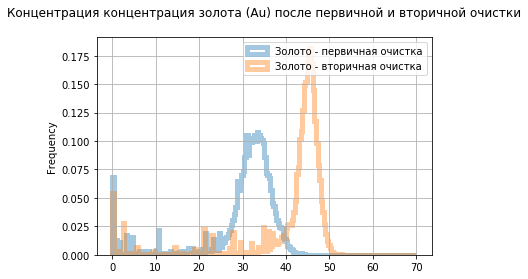

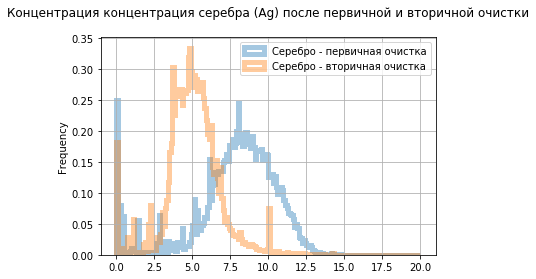

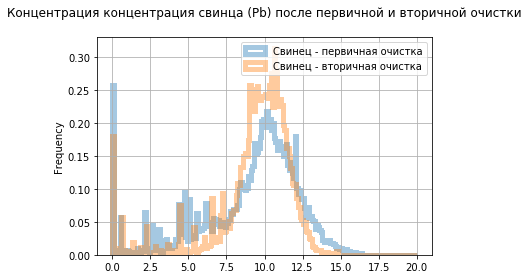

In [5]:
#Золото (Au)
#Построим график концентрации золота (Au) после первичной и вторичной очистки
ax = gold_recovery_full.plot(kind='hist', y='primary_cleaner.output.concentrate_au', histtype='step', range=(0, 70), bins=200, normed=True, linewidth=5, alpha=0.4, label='Золото - первичная очистка')
gold_recovery_full.plot(kind='hist', y='final.output.concentrate_au', histtype='step', range=(0, 70), bins=200, normed=True, linewidth=5, alpha=0.4, label='Золото - вторичная очистка', ax=ax, grid=True, legend=True) 
plt.title('Концентрация концентрация золота (Au) после первичной и вторичной очистки\n')

#Отобразим данные по распределению
display(gold_recovery_full['primary_cleaner.output.concentrate_au'].describe())
display(gold_recovery_full['final.output.concentrate_au'].describe())

#Серебро (Ag)
#Построим график концентрации серебра (Ag) после первичной и вторичной очистки
ax = gold_recovery_full.plot(kind='hist', y='primary_cleaner.output.concentrate_ag', histtype='step', range=(0, 20), bins=200, normed=True, linewidth=5, alpha=0.4, label='Серебро - первичная очистка')
gold_recovery_full.plot(kind='hist', y='final.output.concentrate_ag', histtype='step', range=(0, 20), bins=200, normed=True, linewidth=5, alpha=0.4, label='Серебро - вторичная очистка', ax=ax, grid=True, legend=True) 
plt.title('Концентрация концентрация серебра (Ag) после первичной и вторичной очистки\n')

#Отобразим данные по распределению
display(gold_recovery_full['primary_cleaner.output.concentrate_ag'].describe())
display(gold_recovery_full['final.output.concentrate_ag'].describe())

#Свинец (Pb)
#Построим график концентрации свинца (Pb) после первичной и вторичной очистки
ax = gold_recovery_full.plot(kind='hist', y='primary_cleaner.output.concentrate_pb', histtype='step', range=(0, 20), bins=200, normed=True, linewidth=5, alpha=0.4, label='Свинец - первичная очистка')
gold_recovery_full.plot(kind='hist', y='final.output.concentrate_pb', histtype='step', range=(0, 20), bins=200, normed=True, linewidth=5, alpha=0.4, label='Свинец - вторичная очистка', ax=ax, grid=True, legend=True) 
plt.title('Концентрация концентрация свинца (Pb) после первичной и вторичной очистки\n')

#Отобразим данные по распределению
display(gold_recovery_full['primary_cleaner.output.concentrate_pb'].describe())
display(gold_recovery_full['final.output.concentrate_pb'].describe())

# 2.2 Вывод

Концентрация золота после вторичной очистки возрастает. Концентрация серебра после вторичной очистки уменьшается. Концентрация свинца после вторичной очистки остается практически одинаковым с концентрацией после первичной очистки.

# 2.3 Распределения размеров гранул сырья на обучающей и тестовой выборках

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

count    16860.000000
mean         7.297285
std          0.619166
min          1.080000
25%          6.940000
50%          7.285000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

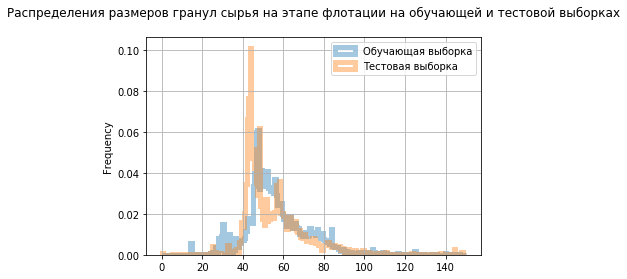

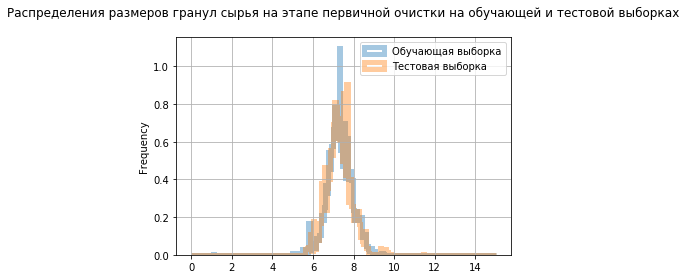

In [6]:
#Флотация
#Построим распределение размера гранул сырья на этапе флотации 
ax = gold_recovery_train.plot(kind='hist', y='rougher.input.feed_size', histtype='step', range=(0, 150), bins=200, normed=True, linewidth=5, alpha=0.4, label='Обучающая выборка')
gold_recovery_test.plot(kind='hist', y='rougher.input.feed_size', histtype='step', range=(0, 150), bins=200, normed=True, linewidth=5, alpha=0.4, label='Тестовая выборка', ax=ax, grid=True, legend=True) 
plt.title('Распределения размеров гранул сырья на этапе флотации на обучающей и тестовой выборках\n')
#Отобразим данные по распределению
display(gold_recovery_train['rougher.input.feed_size'].describe())
display(gold_recovery_test['rougher.input.feed_size'].describe())

#Первый этап очистки
#Построим распределение размера гранул сырья на первом этапе очистки
ax = gold_recovery_train.plot(kind='hist', y='primary_cleaner.input.feed_size', histtype='step', range=(0, 15), bins=200, normed=True, linewidth=5, alpha=0.4, label='Обучающая выборка')
gold_recovery_test.plot(kind='hist', y='primary_cleaner.input.feed_size', histtype='step', range=(0, 15), bins=200, normed=True, linewidth=5, alpha=0.4, label='Тестовая выборка', ax=ax, grid=True, legend=True) 
plt.title('Распределения размеров гранул сырья на этапе первичной очистки на обучающей и тестовой выборках\n')
#Отобразим данные по распределению
display(gold_recovery_train['primary_cleaner.input.feed_size'].describe())
display(gold_recovery_test['primary_cleaner.input.feed_size'].describe())


# 2.4 Вывод

Распределение размеров гранул очень схоже, за исключением, что на этапе флотации гранулы сильнее сконцентрированы в масимальном значении. 

# 2.5 Суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

count    22716.000000
mean        19.736471
std          5.884205
min          0.030000
25%         16.753398
50%         19.758543
75%         23.590555
max         35.071987
Name: sum_rougher_input, dtype: float64

count    16860.000000
mean        19.136674
std          5.848893
min          0.030000
25%         16.435163
50%         18.983164
75%         22.347876
max         35.071987
Name: sum_rougher_input, dtype: float64

count    22716.000000
mean        37.386784
std          9.627856
min          0.029924
25%         37.439192
50%         40.003162
75%         42.211621
max         55.568687
Name: sum_rougher_output, dtype: float64

count    16860.000000
mean        36.489754
std         10.373196
min          0.029924
25%         36.728892
50%         39.490809
75%         41.651915
max         55.568687
Name: sum_rougher_output, dtype: float64

count    22716.000000
mean        56.132498
std         12.472387
min          0.030000
25%         58.704299
50%         60.078165
75%         60.991523
max         65.575259
Name: sum_final_output, dtype: float64

count    16860.000000
mean        55.684574
std         13.295298
min          0.030000
25%         58.535288
50%         59.986295
75%         60.935374
max         65.575259
Name: sum_final_output, dtype: float64

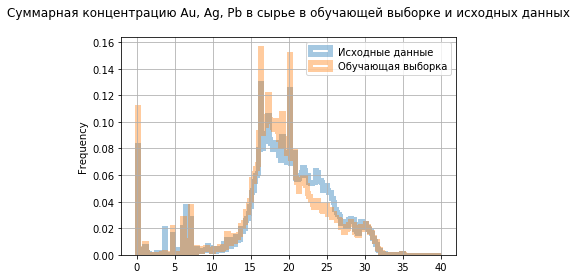

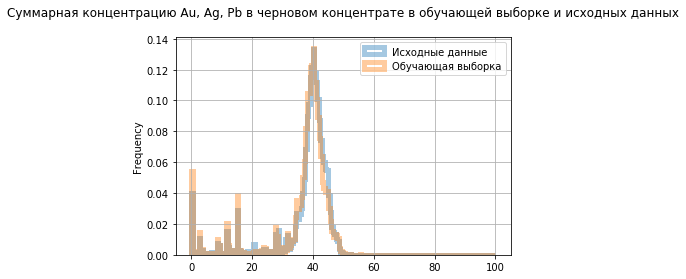

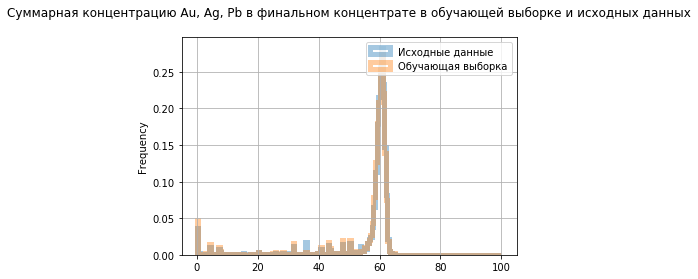

In [7]:
#Исходные данные:
#В сырье
gold_recovery_full['sum_rougher_input'] = gold_recovery_full['rougher.input.feed_ag'] + gold_recovery_full['rougher.input.feed_au'] + gold_recovery_full['rougher.input.feed_pb']
#В черновом концентрате
gold_recovery_full['sum_rougher_output'] = gold_recovery_full['rougher.output.concentrate_ag'] + gold_recovery_full['rougher.output.concentrate_au'] + gold_recovery_full['rougher.output.concentrate_pb']
#В финальном концентрате
gold_recovery_full['sum_final_output'] = gold_recovery_full['final.output.concentrate_ag'] + gold_recovery_full['final.output.concentrate_au'] + gold_recovery_full['final.output.concentrate_pb']

#Тестовая выборка:
#В сырье
gold_recovery_train['sum_rougher_input'] = gold_recovery_train['rougher.input.feed_ag'] + gold_recovery_train['rougher.input.feed_au'] + gold_recovery_train['rougher.input.feed_pb']
#В черновом концентрате
gold_recovery_train['sum_rougher_output'] = gold_recovery_train['rougher.output.concentrate_ag'] + gold_recovery_train['rougher.output.concentrate_au'] + gold_recovery_train['rougher.output.concentrate_pb']
#В финальном концентрате
gold_recovery_train['sum_final_output'] = gold_recovery_train['final.output.concentrate_ag'] + gold_recovery_train['final.output.concentrate_au'] + gold_recovery_train['final.output.concentrate_pb']

#Сравнение концентраций в обучающей выборке и исходных данных:
#В сырье
ax = gold_recovery_full.plot(kind='hist', y='sum_rougher_input', histtype='step', range=(0, 40), bins=200, normed=True, linewidth=5, alpha=0.4, label='Исходные данные')
gold_recovery_train.plot(kind='hist', y='sum_rougher_input', histtype='step', range=(0, 40), bins=200, normed=True, linewidth=5, alpha=0.4, label='Обучающая выборка', ax=ax, grid=True, legend=True) 
plt.title('Cуммарная концентрацию Au, Ag, Pb в сырье в обучающей выборке и исходных данных\n')

display(gold_recovery_full['sum_rougher_input'].describe())
display(gold_recovery_train['sum_rougher_input'].describe())

#В черновом концентрате
ax = gold_recovery_full.plot(kind='hist', y='sum_rougher_output', histtype='step', range=(0, 100), bins=200, normed=True, linewidth=5, alpha=0.4, label='Исходные данные')
gold_recovery_train.plot(kind='hist', y='sum_rougher_output', histtype='step', range=(0, 100), bins=200, normed=True, linewidth=5, alpha=0.4, label='Обучающая выборка', ax=ax, grid=True, legend=True) 
plt.title('Cуммарная концентрацию Au, Ag, Pb в черновом концентрате в обучающей выборке и исходных данных\n')

display(gold_recovery_full['sum_rougher_output'].describe())
display(gold_recovery_train['sum_rougher_output'].describe())

#В финальном концентрате
ax = gold_recovery_full.plot(kind='hist', y='sum_final_output', histtype='step', range=(0, 100), bins=200, normed=True, linewidth=5, alpha=0.4, label='Исходные данные')
gold_recovery_train.plot(kind='hist', y='sum_final_output', histtype='step', range=(0, 100), bins=200, normed=True, linewidth=5, alpha=0.4, label='Обучающая выборка', ax=ax, grid=True, legend=True) 
plt.title('Cуммарная концентрацию Au, Ag, Pb в финальном концентрате в обучающей выборке и исходных данных\n')

display(gold_recovery_full['sum_final_output'].describe())
display(gold_recovery_train['sum_final_output'].describe())


In [8]:
#Удалим выбросы значение которых меньше 1
low_concentration = gold_recovery_full[gold_recovery_full['sum_final_output'] < 1]
full_normal_concentration = gold_recovery_full[~gold_recovery_full.index.isin(low_concentration.index)]
gold_recovery_train = gold_recovery_train[gold_recovery_train.index.isin(full_normal_concentration.index)]
gold_recovery_test = gold_recovery_test[gold_recovery_test.index.isin(full_normal_concentration.index)]

# 2.6 Вывод

Согласно полученным распределениям, видно что около нуля имеются выбросы. В связи с чем выбросы, значение которых меньше 1, были удалены.

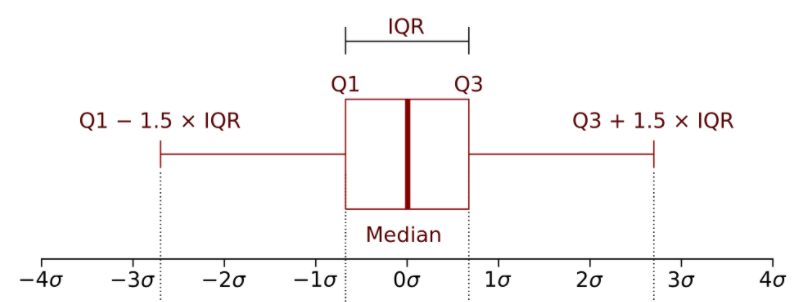

# 3. Модель

# 3.1 Функция для вычисления итоговой sMAPE

In [9]:
#Напишем функцию sMAPE
#A = target
#F = predictions
def smape(A, F):
    return 1/len(A) * sum(2 * abs(F-A) / (abs(A) + abs(F))*100)

my_scorer = make_scorer(smape, greater_is_better=False)

# 3.2 Обучение моделей и оценка их качества кросс-валидацией

# 3.2.1 Этап флотация

In [10]:
#Выделим признаки для этапа флотации
features_train_1 = gold_recovery_train[['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']]

#Выделим целевой признак из общих данных
target_train_1 = gold_recovery_train['rougher.output.recovery']

#Выделим из тренировочных данных валидационные данные. Данные делим в пропорции: 80% на 20%.
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_train_1, target_train_1, test_size=0.20, random_state=12345)

best_model = None
best_result = 0

#Дерево решений
for depth in range(1,20):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)#установим гиперпараметры
    model.fit(features_train_1, target_train_1) #обучим модель на тренировочной выборке 
    result = cross_val_score(model, features_valid_1, target_valid_1, cv=3).mean()
    if result > best_result:
            best_model = model
            best_result = result

print('Модель: дерево решений.')
print('Лучшая модель:', best_model)
model = DecisionTreeRegressor(random_state=12345, max_depth=5)#установим гиперпараметры
model.fit(features_train_1, target_train_1) #обучим модель на тренировочной выборке 
result = cross_val_score(model, features_valid_1, target_valid_1, scoring=my_scorer, cv=3).mean()
print('Симметричная средняя абсолютная процентная ошибка на валидационной выборке:', result)

#Случайный лес
for est in range(1,12):
    for depth in range(1,12):
        model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=est, min_samples_split=3, min_samples_leaf=1) #установим гиперпараметры
        model.fit(features_train_1, target_train_1) # обучим модель на тренировочной выборке
        result = cross_val_score(model, features_valid_1, target_valid_1, cv=3).mean() # посчитаем качество модели на валидационной выборке
        if result > best_result:
            best_model = model
            best_result = result

print('-----------------------------------------------------------')
print('\nМодель: случайный лес.')
print('Лучшая модель:', best_model)
model = RandomForestRegressor(random_state=12345, max_depth=11, n_estimators=11, min_samples_split=3, min_samples_leaf=1) #установим гиперпараметры
model.fit(features_train_1, target_train_1) # обучим модель на тренировочной выборке
result = cross_val_score(model, features_valid_1, target_valid_1, scoring=my_scorer, cv=3).mean() # посчитаем качество модели на валидационной выборке
print('Симметричная средняя абсолютная процентная ошибка на валидационной выборке:', result)

#Линейная регрессия
model = LinearRegression()#создадим модель и установим гиперпараметры
model.fit(features_train_1, target_train_1) #обучим модель на тренировочной выборке
result = cross_val_score(model, features_valid_1, target_valid_1, scoring=my_scorer, cv=3).mean() #посчитаем качество модели
print('-----------------------------------------------------------')
print('\nМодель: линейная регрессия.')
print('Симметричная средняя абсолютная процентная ошибка на валидационной выборке:', result)

Модель: дерево решений.
Лучшая модель: DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12345, splitter='best')
Симметричная средняя абсолютная процентная ошибка на валидационной выборке: -6.533702891549436
-----------------------------------------------------------

Модель: случайный лес.
Лучшая модель: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, random_state=12345, ve

# 3.2.2 Финальный этап

In [11]:
#Выделим признаки для финального этапа
features_train_2 = gold_recovery_train[['secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_cleaner.state.floatbank5_b_level',
 'secondary_cleaner.state.floatbank6_a_air',
 'secondary_cleaner.state.floatbank6_a_level']]

#Выделим целевой признак 
target_train_2 = gold_recovery_train['final.output.recovery']

#Выделим из тренировочных данных валидационные данные. Данные делим в пропорции: 80% на 20%.
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_train_2, target_train_2, test_size=0.20, random_state=12345)


#Случайный лес
model = RandomForestRegressor(random_state=12345, max_depth=11, n_estimators=11, min_samples_split=3, min_samples_leaf=1) #установим гиперпараметры
model.fit(features_train_2, target_train_2) # обучим модель на тренировочной выборке
result = cross_val_score(model, features_valid_2, target_valid_2, scoring=my_scorer, cv=3).mean() # посчитаем качество модели на валидационной выборке
print('\nМодель: случайный лес.')
print('Симметричная средняя абсолютная процентная ошибка на валидационной выборке:', result)

#Линейная регрессия
model = LinearRegression()#создадим модель и установим гиперпараметры
model.fit(features_train_2, target_train_2) #обучим модель на тренировочной выборке
result = cross_val_score(model, features_valid_2, target_valid_2, scoring=my_scorer, cv=3).mean() #посчитаем качество модели
print('-----------------------------------------------------------')
print('\nМодель: линейная регрессия.')
print('Симметричная средняя абсолютная процентная ошибка на валидационной выборке:', result)


Модель: случайный лес.
Симметричная средняя абсолютная процентная ошибка на валидационной выборке: -10.539215701370123
-----------------------------------------------------------

Модель: линейная регрессия.
Симметричная средняя абсолютная процентная ошибка на валидационной выборке: -12.022424851801143


# 3.2.3 Проверка лучшей модели на тестовой выборке на этапе флотация

In [12]:
#Тестовая выборка на этапе флотации
features_test_1 = gold_recovery_test[['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level']]
 
target_test_1 = gold_recovery_full['rougher.output.recovery'].loc[gold_recovery_test.index].reset_index(drop=True)

#Случайный лес
model = RandomForestRegressor(random_state=12345, max_depth=11, n_estimators=11, min_samples_split=3, min_samples_leaf=1) #установим гиперпараметры
model.fit(features_train_1, target_train_1) # обучим модель на тренировочной выборке
predictions_test_1 = model.predict(features_test_1) #предскажем результат на валидационной выборк
random_forest_result_1 = cross_val_score(model, features_test_1, target_test_1, scoring=my_scorer, cv=3).mean() # посчитаем качество модели на валидационной выборке
print('\nМодель: случайный лес.')
print('Симметричная средняя абсолютная процентная ошибка на тестовой выборке:', random_forest_result_1)


Модель: случайный лес.
Симметричная средняя абсолютная процентная ошибка на тестовой выборке: -15.175894270138036


# 3.2.4 Проверка лучшей модели на тестовой выборке на финальном этапе

In [13]:
#Тестовая выборка на финальном этапе
features_test_2 = gold_recovery_test[['secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_cleaner.state.floatbank5_b_level',
 'secondary_cleaner.state.floatbank6_a_air',
 'secondary_cleaner.state.floatbank6_a_level']]

target_test_2 = gold_recovery_full['final.output.recovery'].loc[gold_recovery_test.index].reset_index(drop=True)

#Случайный лес
model = RandomForestRegressor(random_state=12345, max_depth=11, n_estimators=11, min_samples_split=3, min_samples_leaf=1) #установим гиперпараметры
model.fit(features_train_2, target_train_2) # обучим модель на тренировочной выборке
predictions_test_2 = model.predict(features_test_2) #предскажем результат на валидационной выборк
random_forest_result_2 = cross_val_score(model, features_test_2, target_test_2, scoring=my_scorer, cv=3).mean() # посчитаем качество модели на валидационной выборке
print('\nМодель: случайный лес.')
print('Симметричная средняя абсолютная процентная ошибка на тестовой выборке:', random_forest_result_2)


Модель: случайный лес.
Симметричная средняя абсолютная процентная ошибка на тестовой выборке: -13.975528591382401


# 3.2.5 Вычислим sMAPE по данным на тестовой выборке

In [14]:
sMAPE_test = 0.25 * random_forest_result_1 + 0.75 * random_forest_result_2
print('sMAPE на тестовой выборке', sMAPE_test)

sMAPE на тестовой выборке -14.275620011071311


# 3.2.6 Вычислим sMAPE по формуле

In [15]:
#Напишем функцию sMAPE
#A = target
#F = predictions
def smape(A, F):
    return 1/len(A) * sum(2 * abs(F-A) / (abs(A) + abs(F))*100)

#Вычислим sMAPE на этапе флотации
sMAPE_rougher = smape(target_test_1, predictions_test_1)

#Вычислим sMAPE на финальном этапе
sMAPE_final = smape(target_test_2, predictions_test_2)

#Вычислим итоговое sMAPE 
sMAPE_total = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
print('Итоговое sMAPE =', sMAPE_total)

Итоговое sMAPE = 13.667589835950034


******

In [16]:
# КОНСТАНТНАЯ МОДЕЛЬ
#A = target
#F = predictions
def smape(A, F):
    return 1/len(A) * sum(2 * abs(F-A) / (abs(A) + abs(F))*100)

#Вычислим sMAPE на этапе флотации
sMAPE_rougher = smape(target_test_1, target_train_1.median())

#Вычислим sMAPE на финальном этапе
sMAPE_final = smape(target_test_2, target_train_2.median())

#Вычислим итоговое sMAPE 
sMAPE_total = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
print('Итоговое sMAPE =', sMAPE_total)

Итоговое sMAPE = 11.660313975683122


# 3.3 Вывод

В результате обучения моделей (дерево решений, случайный лес, линейная регрессия) была найдена лучшая модель, это модель случайный лес со следующими параметрами:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)


Для того чтобы определить качество предсказний модели была написана функция my_scorer = make_scorer(smape, greater_is_better=False) и добавлена в метрику через параметры 'scoring'. Метрика sMAPE показывает количество совершаемых ошибок в процентах. В результате, чем ближе знчение к нулю, тем лучше предсказывает модель, а так как модель симметричная, то значения sMAPE могут быть и отрицательными.  

На тестововой выборке были получены следующие значения:
- sMAPE(флотация) = -15.175
- sMAPE(финальный этап) = -13.975
Далее рассчитано итоговое sMAPE, которое равно -14.275620011071311. А итоговое sMAPE рассчитаное по формуле составляет 13.667. И  эти значения очень близки, но с разными знаками. Но так как метрика sMAPE симметричная, то это находится в рамках допустимого. И то что эти значения очень близки, означает, что наша модель случайный лес предсказывает хорошо.

КОММЕНТАРИЙ СТУДЕНТА: MAE исправил.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке